Comparisons of locomotion predictions of different mechanistic latent variable models.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from disp import set_plot

# Basic comparison of linear vs dynamical-adapting single vs population fits.

In [6]:
KBEHAVS = ['FFV', 'FLS']

rslts = {kbehav: [] for kbehav in KBEHAVS}

# purely linear fits
for kbehav in KBEHAVS:
    fit_data = np.load(f'data/simple/mlv_c/lin_filter/c_rc_lin_{kbehav.lower()}_276_tr.npy', allow_pickle=True)[0]
    nsplit = len(fit_data['r2_test'])
    
    key = 'Lin. filt. (r-cos.)'
    r2 = fit_data['r2_test'].mean()
    err = fit_data['r2_test'].std()/np.sqrt(nsplit)
    
    rslts[kbehav].append((key, r2, err))
    
    fit_data = np.load(f'data/simple/mlv_c/lin_filter/c_rect_lin_{kbehav.lower()}_276_tr.npy', allow_pickle=True)[0]
    nsplit = len(fit_data['r2_test'])
    
    key = 'Lin. filt (rect)'
    r2 = fit_data['r2_test'].mean()
    err = fit_data['r2_test'].std()/np.sqrt(nsplit)
    
    rslts[kbehav].append((key, r2, err))

In [7]:
labels = {'lin': 'Lin.', 'ln': 'LN', 'dyn': 'NLA'}
for nrl_mdl in ['lin', 'ln', 'dyn']:
    # load single ROI results
    for kbehav in KBEHAVS:
        fit_data = np.load(f'data/simple/mlv_c/neur_basic/c_baker_{nrl_mdl}_single_{kbehav.lower()}_276_tr.npy', allow_pickle=True)[0]
        nsplit, nr = fit_data['r2s_test'].shape
        
        # median single variance explained
        key = f'{labels[nrl_mdl]} neur (avg)'
        
        idx_med = np.argsort(fit_data['r2s_test'].mean(axis=0))[nr//2]  # arg-median
        r2 = fit_data['r2s_test'][:, idx_med].mean()
        err = fit_data['r2s_test'][:, idx_med].std()/np.sqrt(nsplit)
        
        rslts[kbehav].append((key, r2, err))
        
        # best single variance explained
        key = f'{labels[nrl_mdl]} neur (best)'
        
        idx_best = fit_data['r2s_test'].mean(axis=0).argmax()
        r2 = fit_data['r2s_test'][:, idx_best].mean()
        err = fit_data['r2s_test'][:, idx_best].std()/np.sqrt(nsplit)
        
        rslts[kbehav].append((key, r2, err))
        
    # load population ROI results
    for kbehav in KBEHAVS:
        fit_data = np.load(f'data/simple/mlv_c/neur_basic/c_baker_{nrl_mdl}_all_{kbehav.lower()}_276_tr.npy', allow_pickle=True)[0]
        
        key = f'{labels[nrl_mdl]} neur pop.'
        
        r2 = fit_data['r2_test'].mean()
        nsplit = len(fit_data['r2_test'])
        err = fit_data['r2_test'].std()/np.sqrt(nsplit)
        
        rslts[kbehav].append((key, r2, err))

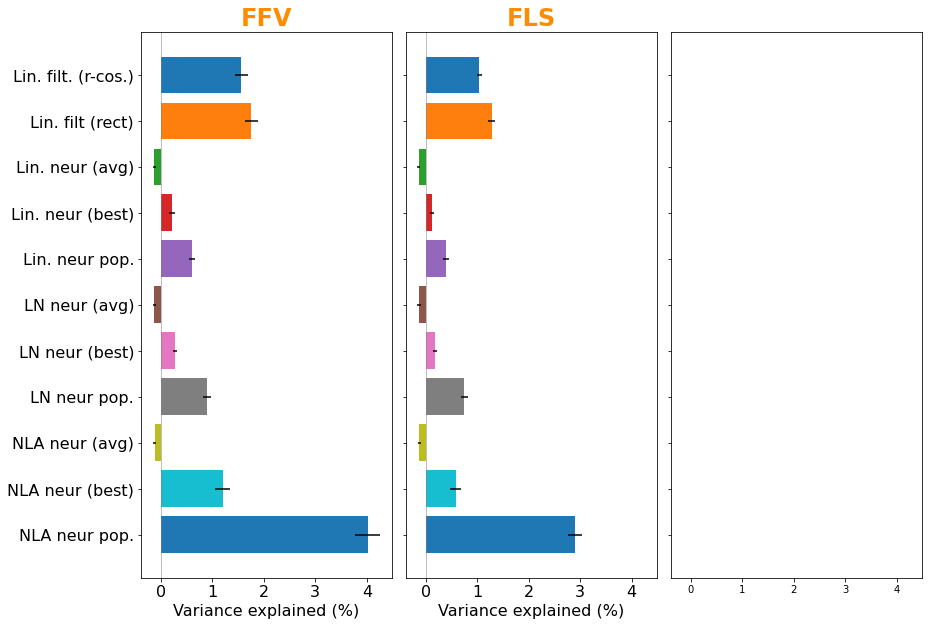

In [8]:
fig, axs = plt.subplots(1, 3, figsize=(13, .8*len(rslts[KBEHAVS[0]])), tight_layout=True, sharex=True, sharey=True)
for kbehav, ax in zip(KBEHAVS, axs):
    for crslt, (key, r2, err) in enumerate(rslts[kbehav]):
        ax.barh([-crslt], [r2*100], xerr=[err*100])
        
    if ax == axs[0]:
        ax.set_yticks(-np.arange(len(rslts[kbehav])))
        ax.set_yticklabels([rslt[0] for rslt in rslts[kbehav]])
        
    ax.axvline(0, color='gray', lw=.5)
    set_plot(ax, x_label='Variance explained (%)', font_size=16)
    ax.set_title(kbehav, color='darkorange', fontweight='bold', fontsize=24)

# Basic comparison of linear vs dynamical-adapting single vs population fits
Now with ridge regression + output smoothing.

In [22]:
KBEHAVS = ['FFV', 'FLS']

rslts = {kbehav: [] for kbehav in KBEHAVS}

# purely linear fits
for kbehav in KBEHAVS:
    fit_data = np.load(f'data/simple/mlv_c/lin_filter/c_smooth_y_20_rc_lin_{kbehav.lower()}_276_tr.npy', allow_pickle=True)[0]
    nsplit = len(fit_data['r2_test'])
    
    key = 'Lin. filt. (r-cos)'
    r2 = fit_data['r2_test'].mean()
    err = fit_data['r2_test'].std()/np.sqrt(nsplit)
    
    rslts[kbehav].append((key, r2, err))
    
    fit_data = np.load(f'data/simple/mlv_c/lin_filter/c_smooth_y_20_rect_lin_{kbehav.lower()}_276_tr.npy', allow_pickle=True)[0]
    nsplit = len(fit_data['r2_test'])
    
    key = 'Lin. filt. (rect)'
    r2 = fit_data['r2_test'].mean()
    err = fit_data['r2_test'].std()/np.sqrt(nsplit)
    
    rslts[kbehav].append((key, r2, err))

In [23]:
labels = {'lin': 'Lin.', 'ln': 'LN', 'dyn': 'NLA'}
selector_single = 'smooth_y_20'
selector_ppln = 'ridge_0.1_smooth_y_20'
for nrl_mdl in ['lin', 'ln', 'dyn']:
    # load single ROI results
    for kbehav in KBEHAVS:
        fit_data = np.load(f'data/simple/mlv_c/neur_basic/c_baker_{selector_single}_{nrl_mdl}_single_{kbehav.lower()}_276_tr.npy', allow_pickle=True)[0]
        nsplit, nr = fit_data['r2s_test'].shape
        
        # median single variance explained
        key = f'{labels[nrl_mdl]} neur (avg)'
        
        idx_med = np.argsort(fit_data['r2s_test'].mean(axis=0))[nr//2]  # arg-median
        r2 = fit_data['r2s_test'][:, idx_med].mean()
        err = fit_data['r2s_test'][:, idx_med].std()/np.sqrt(nsplit)
        
        rslts[kbehav].append((key, r2, err))
        
        # best single variance explained
        key = f'{labels[nrl_mdl]} neur (best)'
        
        idx_best = fit_data['r2s_test'].mean(axis=0).argmax()
        r2 = fit_data['r2s_test'][:, idx_best].mean()
        err = fit_data['r2s_test'][:, idx_best].std()/np.sqrt(nsplit)
        
        rslts[kbehav].append((key, r2, err))
        
    # load population ROI results
    for kbehav in KBEHAVS:
        fit_data = np.load(f'data/simple/mlv_c/neur_basic/c_baker_{selector_ppln}_{nrl_mdl}_all_{kbehav.lower()}_276_tr.npy', allow_pickle=True)[0]
        
        key = f'{labels[nrl_mdl]} neur pop'
        
        r2 = fit_data['r2_test'].mean()
        nsplit = len(fit_data['r2_test'])
        err = fit_data['r2_test'].std()/np.sqrt(nsplit)
        
        rslts[kbehav].append((key, r2, err))

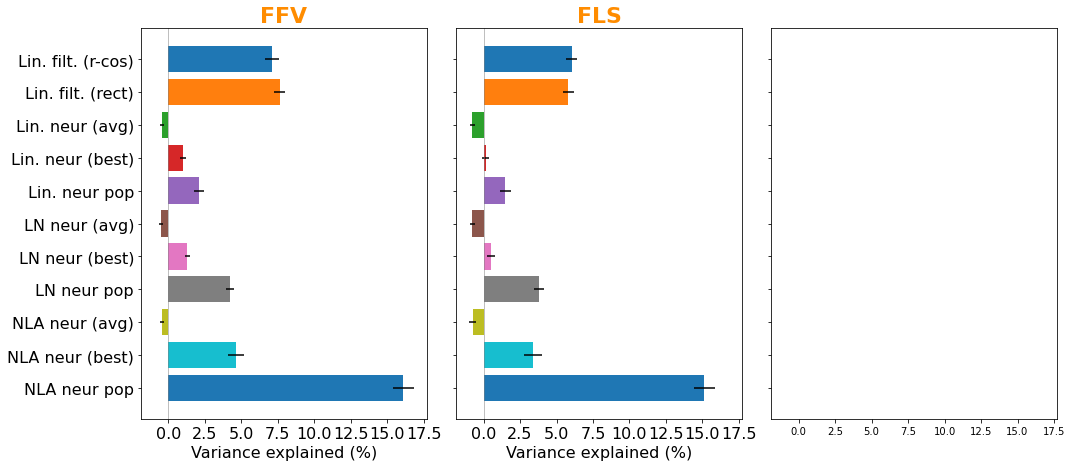

In [24]:
fig, axs = plt.subplots(1, 3, figsize=(15, .6*len(rslts[KBEHAVS[0]])), tight_layout=True, sharex=True, sharey=True)
for kbehav, ax in zip(KBEHAVS, axs):
    for crslt, (key, r2, err) in enumerate(rslts[kbehav]):
        ax.barh([-crslt], [r2*100], xerr=[err*100])
        
    if ax == axs[0]:
        ax.set_yticks(-np.arange(len(rslts[kbehav])))
        ax.set_yticklabels([rslt[0] for rslt in rslts[kbehav]])
        
    ax.axvline(0, color='gray', lw=.5)
    set_plot(ax, x_label='Variance explained (%)', font_size=16)
    ax.set_title(kbehav, color='darkorange', fontweight='bold', fontsize=22)

Fraction FFV variance explained vs smoothing kernel width

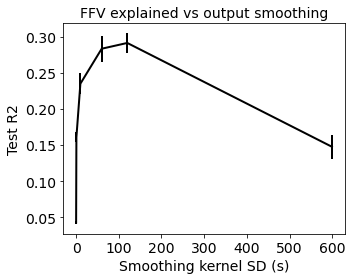

In [16]:
SMOOTH_YS = np.array([0, 20, 300, 1800, 3600, 18000])

rslts = {'FFV': []}
for smooth_y in SMOOTH_YS:
    if not smooth_y:
        fit_data = np.load(f'data/simple/mlv_c/neur_basic/c_baker_ridge_0.1_dyn_all_ffv_276_tr.npy', allow_pickle=True)[0]
    else:
        fit_data = np.load(f'data/simple/mlv_c/neur_basic/c_baker_ridge_0.1_smooth_y_{smooth_y}_dyn_all_ffv_276_tr.npy', allow_pickle=True)[0]
    
    key = f'smooth y {smooth_y}'
    
    r2 = fit_data['r2_test'].mean()
    nsplit = len(fit_data['r2_test'])
    std = fit_data['r2_test'].std()/np.sqrt(nsplit)
    
    rslts['FFV'].append((key, r2, std))
    
fig, ax = plt.subplots(1, 1, figsize=(5, 4), tight_layout=True)
ax.errorbar(SMOOTH_YS/30.03, [rslt[1] for rslt in rslts['FFV']], yerr=[rslt[2] for rslt in rslts['FFV']], c='k', lw=2)
set_plot(ax, x_label='Smoothing kernel SD (s)', y_label='Test R2', title='FFV explained vs output smoothing', font_size=14)

# Dynamical model with ROI subsets used

In [5]:
KBEHAVS = ['FFV', 'FLS']

rslts = {kbehav: [] for kbehav in KBEHAVS}

# load population ROI results
for roi_set in ['all', 'dep', 'hyp', 'nonsoma', 'soma']:
    for kbehav in KBEHAVS:
        fit_data = np.load(f'data/simple/mlv_c/neur_basic/c_baker_dyn_{roi_set}_{kbehav.lower()}_276_tr.npy', allow_pickle=True)[0]

        key = f'dyn neurons\n {roi_set}'

        r2 = fit_data['r2_test'].mean()
        nsplit = len(fit_data['r2_test'])
        err = fit_data['r2_test'].std()/np.sqrt(nsplit)

        rslts[kbehav].append((key, r2, err))

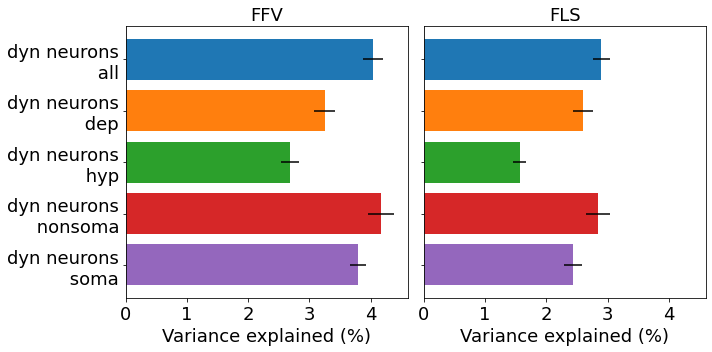

In [6]:
fig, axs = plt.subplots(1, 2, figsize=(10, len(rslts[KBEHAVS[0]])), tight_layout=True, sharex=True, sharey=True)
for kbehav, ax in zip(KBEHAVS, axs):
    for crslt, (key, r2, err) in enumerate(rslts[kbehav]):
        ax.barh([-crslt], [r2*100], xerr=[err*100])
        
    if ax == axs[0]:
        ax.set_yticks(-np.arange(len(rslts[kbehav])))
        ax.set_yticklabels([rslt[0] for rslt in rslts[kbehav]])
        
    ax.axvline(0, color='gray', lw=.5)
    set_plot(ax, x_label='Variance explained (%)', title=kbehav, font_size=18)

# Dynamical model with perturbed parameters

In [5]:
KBEHAVS = ['FFV', 'FLS']
PPLN_KEYS = [
    'all', 'nonadapt', 'pureselect', 'nonselect', 'taufixed', 'taurhalf', 'taurdbl', 'paramshuffle',
]

rslts = {kbehav: [] for kbehav in KBEHAVS}

# load results
for ppln_key in PPLN_KEYS:
    for kbehav in KBEHAVS:
        key = f'dyn neurons\n {ppln_key}'
        
        try:
            fit_data = np.load(f'data/simple/mlv_c/perturbed_ppln/c_baker_dyn_{ppln_key}_{kbehav.lower()}_276_tr.npy', allow_pickle=True)[0]

            r2 = fit_data['r2_test'].mean()
            nsplit = len(fit_data['r2_test'])
            err = fit_data['r2_test'].std()/np.sqrt(nsplit)
        except:
            r2 = np.nan
            err = np.nan

        rslts[kbehav].append((key, r2, err))

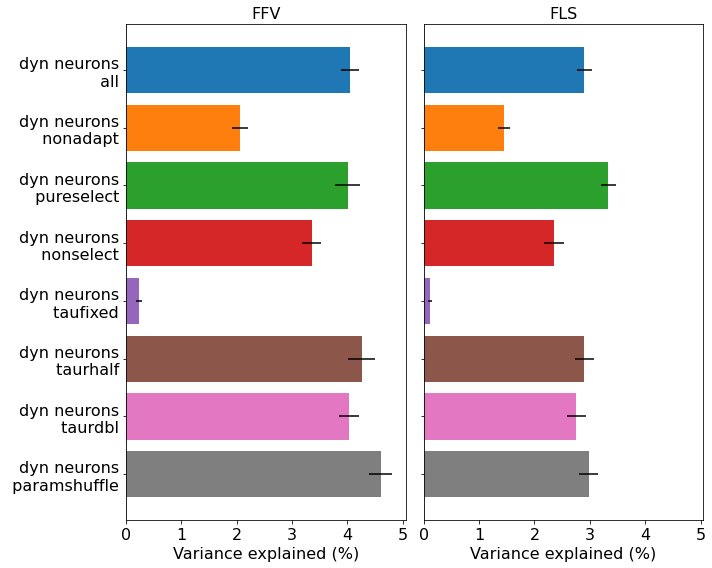

In [6]:
fig, axs = plt.subplots(1, 2, figsize=(10, len(rslts[KBEHAVS[0]])), tight_layout=True, sharex=True, sharey=True)
for kbehav, ax in zip(KBEHAVS, axs):
    for crslt, (key, r2, err) in enumerate(rslts[kbehav]):
        ax.barh([-crslt], [r2*100], xerr=[err*100])
        
    if ax == axs[0]:
        ax.set_yticks(-np.arange(len(rslts[kbehav])))
        ax.set_yticklabels([rslt[0] for rslt in rslts[kbehav]])
        
    ax.axvline(0, color='gray', lw=.5)
    set_plot(ax, x_label='Variance explained (%)', title=kbehav, font_size=16)

# Targeted analysis of fixed timescales

nonadaptive

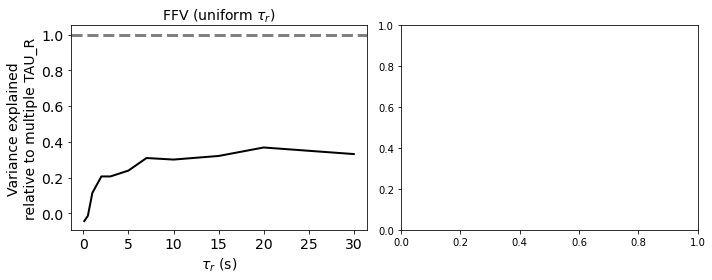

In [2]:
TAU_RS = [.1, .5, 1, 2, 3, 5, 7, 10, 15, 20, 30]
# TAU_RS = [.1, .5, 2, 3, 7, 10, 15, 20]

KBEHAVS = ['FFV']
PPLN_KEYS = ['nonadapt'] + [f'taufixed_{tau_r}' for tau_r in TAU_RS]

rslts = {kbehav: [] for kbehav in KBEHAVS}

# load results
for ppln_key in PPLN_KEYS:
    for kbehav in KBEHAVS:
        key = f'dyn neurons\n {ppln_key}'
        
        try:
            fit_data = np.load(f'data/simple/mlv_c/perturbed_ppln/c_baker_dyn_{ppln_key}_{kbehav.lower()}_276_tr.npy', allow_pickle=True)[0]

            r2 = fit_data['r2_test'].mean()
            nsplit = len(fit_data['r2_test'])
            err = fit_data['r2_test'].std()/np.sqrt(nsplit)
        except:
            r2 = np.nan
            err = np.nan

        rslts[kbehav].append((key, r2, err))
        
fig, axs = plt.subplots(1, 2, figsize=(10, 4), tight_layout=True)
for kbehav, ax in zip(KBEHAVS, axs):
    r2s = np.array([rslt[1] for rslt in rslts[kbehav]])
    ax.plot(TAU_RS, r2s[1:]/r2s[0], c='k', lw=2)
    ax.axhline(1, c='gray', ls='--', lw=3)
    set_plot(ax, x_label=r'$\tau_r$ (s)', y_label='Variance explained\nrelative to multiple TAU_R', title=r'FFV (uniform $\tau_r$)', font_size=14)

# Dynamical model with perturbed parameters
Now with ridge regression and behavior smoothing

In [28]:
KBEHAVS = ['FFV', 'FLS']
PPLN_KEYS = [
#     'all', 'nonadapt', 'pureselect', 'nonselect',
    'all', 'nonadapt', 'pureselect', 'nonselect', 'paramshuffle',
]

rslts = {kbehav: [] for kbehav in KBEHAVS}

# load results
for ppln_key in PPLN_KEYS:
    for kbehav in KBEHAVS:
        key = f'NLA neurons\n {ppln_key}'
        
        try:
            fit_data = np.load(f'data/simple/mlv_c/perturbed_ppln/c_baker_ridge_0.1_smooth_y_20_dyn_{ppln_key}_{kbehav.lower()}_276_tr.npy', allow_pickle=True)[0]

            r2 = fit_data['r2_test'].mean()
            nsplit = len(fit_data['r2_test'])
            err = fit_data['r2_test'].std()/np.sqrt(nsplit)
        except:
            r2 = np.nan
            err = np.nan

        rslts[kbehav].append((key, r2, err))

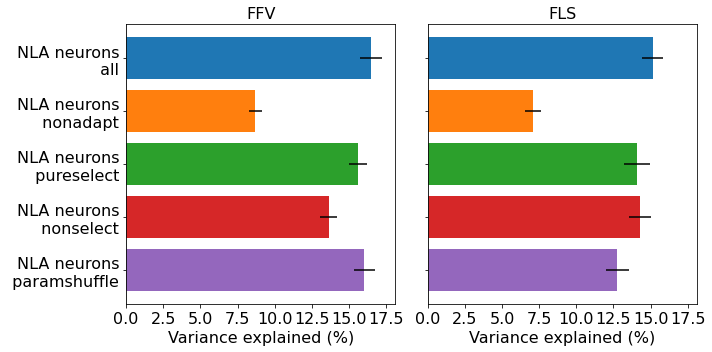

In [29]:
fig, axs = plt.subplots(1, 2, figsize=(10, len(rslts[KBEHAVS[0]])), tight_layout=True, sharex=True, sharey=True)
for kbehav, ax in zip(KBEHAVS, axs):
    for crslt, (key, r2, err) in enumerate(rslts[kbehav]):
        ax.barh([-crslt], [r2*100], xerr=[err*100])
        
    if ax == axs[0]:
        ax.set_yticks(-np.arange(len(rslts[kbehav])))
        ax.set_yticklabels([rslt[0] for rslt in rslts[kbehav]])
        
    ax.axvline(0, color='gray', lw=.5)
    set_plot(ax, x_label='Variance explained (%)', title=kbehav, font_size=16)

# Neurally subsampled models
Parameters all sampled independently from marginal param distributions

In [16]:
NRS = np.array([10, 25, 50, 100, 150, 224])
KBEHAVS = ['FFV', 'FLS']
rslts = {kbehav: [] for kbehav in KBEHAVS}

# load population ROI results
for kbehav in rslts.keys():
    for nr in NRS:
        fit_data = np.load(f'data/simple/mlv_c/perturbed_ppln/c_baker_dyn_paramshuffle_nr_{nr}_{kbehav.lower()}_276_tr.npy', allow_pickle=True)[0]

#         key = f'dyn neurons\n {ntr} trials'

        r2 = fit_data['r2_test'].mean()
        nsplit = len(fit_data['r2_test'])
        std = fit_data['r2_test'].std()/np.sqrt(nsplit)

        rslts[kbehav].append((key, r2, std))

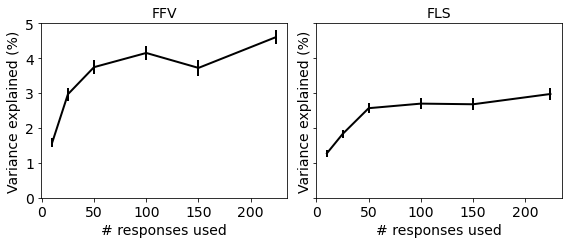

In [17]:
fig, axs = plt.subplots(1, 2, figsize=(8, 3.5), sharex=True, sharey=True, tight_layout=True)

for kbehav, ax in zip(KBEHAVS, axs):
    ax.errorbar(NRS, [rslt[1]*100 for rslt in rslts[kbehav]], yerr=[rslt[2]*100 for rslt in rslts[kbehav]], c='k', lw=2)
    set_plot(ax, y_lim=(0, 5), x_label='# responses used', y_label='Variance explained (%)', title=kbehav, font_size=14)

# Neural activity projected onto top PCs

In [2]:
KBEHAVS = ['FFV', 'FLS']

rslts = {kbehav: [] for kbehav in KBEHAVS}

# load population ROI results
for npc in [3, 10, 224]:
    for kbehav in KBEHAVS:
        fit_data = np.load(f'data/simple/mlv_c/neur_basic/c_baker_dyn_pca_npc_{npc}_{kbehav.lower()}_276_tr.npy', allow_pickle=True)[0]

        key = f'dyn neurons\n{npc} PCs'

        r2 = fit_data['r2_test'].mean()
        nsplit = len(fit_data['r2_test'])
        err = fit_data['r2_test'].std()/np.sqrt(nsplit)

        rslts[kbehav].append((key, r2, err))

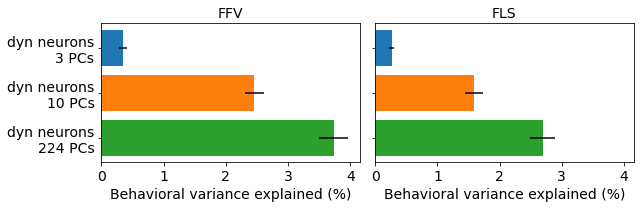

In [7]:
fig, axs = plt.subplots(1, 2, figsize=(9, len(rslts[KBEHAVS[0]])), tight_layout=True, sharex=True, sharey=True)
for kbehav, ax in zip(KBEHAVS, axs):
    for crslt, (key, r2, err) in enumerate(rslts[kbehav]):
        ax.barh([-crslt], [r2*100], xerr=[err*100])
        
    if ax == axs[0]:
        ax.set_yticks(-np.arange(len(rslts[kbehav])))
        ax.set_yticklabels([rslt[0] for rslt in rslts[kbehav]])
        
    ax.axvline(0, color='gray', lw=.5)
    set_plot(ax, x_label='Behavioral variance explained (%)', title=kbehav, font_size=14)